<a href="https://colab.research.google.com/github/izzul112/ML_BMLT-Proyek_Pertama-Predictive_Analytics-Klasifikasi/blob/main/Proyek_Pertama_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Proyek Machine Learning - Habib Azizul Haq**

# Domain Proyek
Klasifikasi Harga Handphone (HP).

Saat ini hp sudah sangat mudah untuk dimiliki oleh hampir semua orang, mulai dari yg harganya ratusan ribu hingga puluhan juta, tentu tergantung pada kebutuhan masing-masing orang, ada yang menganggap harga puluhan juta itu wajar dan ada yang mengangggapnya itu kemahalan.

# Rubrik/Kriteria Tambahan (Opsional):

*   Hal tersebut tentu membuat kita kadang tidak jadi membeli suatu hp, karena kita khawatir apakah nanti semua fitur tersebut Gimmik atau bukan.
*   Kita kadang juga merasa khawatir apakah semua fitur di suatu hp tersebut secara harga sesuai apa tidak, tentu kita tidak ingin terkena *genjutsu* sales-sales hp di toko yang mengatakah "Beli hp ini aja kak, PUBG rata kanan semua!", namun setelah di rumah kita baru sadar kok beli hp yang ini? Padahal tadi maunya bukan yang ini.
*   Sebagai orang yang jarang tau berita tentang teknologi, dan sedang mencari hp dengan kelas harga tertentu kita kadang bingung dan kesusahan dalam menentukan pilihan


Solusi dari masalah tersebut, kita kembangkan sebuah model Machine Learning (ML) untuk membantu kita yang kesulitan menentukan sebuah rentang kelas harga dari hp, apakah hp dengan spesifikasi sekian-sekian yang berada di kelas harga menengah, apakah sesuai dengan kelas harganya, atau kita di tipu oleh sales-sales hp, karena mereka ingin prodak tersebut segera habis.

*   Referensi
*   List item




# Business Understanding

**Problem Statements**
Menjelaskan pernyataan masalah latar belakang:

*   Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap kelas harga suatu hp?
*   Berapa kelas harga pasar hp dengan karakteristik atau fitur tertentu?

**Goals**
Menjelaskan tujuan dari pernyataan masalah:

*   Mengetahui fitur yang paling berkorelasi dengan kelas harga hp.
*   Membuat model machine learning yang dapat memprediksi kelas harga hp seakurat mungkin berdasarkan fitur-fitur yang ada.


# Rubrik/Kriteria Tambahan (Opsional):

**Solution statements**

*   Untuk menghasilkan model yang optimal namun tetap sederhana kita akan menggunakan 3 algoritma yaitu KNeighborsClassifier, RandomForestClassifier, GradientBoostingClassifier.
*   Dari 3 algoritma di atas kita akan menggunakan metrik Mean Absolute Error yang memang cocok untuk kasus klasifikasi, untuk melihat pada ketiga algoritma diatas mana yang paling powerfull.


# **Data Understanding**
Paragraf awal bagian ini menjelaskan informasi mengenai data yang Anda gunakan dalam proyek. Sertakan juga sumber atau tautan untuk mengunduh dataset. Contoh: UCI Machine Learning Repository.
Kita akan menggunkan dataset yang berisi 21 variabel yang biasanya sering ditanyakan ketika membeli hp atau mungkin menjadi suatu standar yang digunakan masyarakat dalam menggolongkan kelas harga dari suatu hp.

Sumber dataset yang akan kita gunakan berasal dari [Kaggle](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?datasetId=11167&select=train.csv). Yang di publis oleh ABHISHEK SHARMA.

Variabel-variabel pada Mobile Price Classification adalah sebagai berikut:

*   battery_power : total kapasitas baterai dalam mAh
*   blue : apakah memiliki bluethoot atau tidak
*   clock_speed : kecepatan dari prosesor
*   dual_sim : apakah mendukung dua sim card
*   fc : kamera depan dalam mega pixel
*   four_g : sudah 4G atau belum
*   int_memory : memory internal
*   m_dep : kedalaman hp dalam satuan cm
*   mobile_wt : berat dari hp
*   n_cores : jumlah dari core prosessor
*   pc : kamera utama dalam mega pixel
*   px_height : tinggi resolusi dalam satuan pixel
*   px_width : lebar resolusi dalam satuan pixel
*   ram : jumlah ram yang dipakai dalam satuan Megabytes
*   sc_h : tinggi layar hp dalam satuan cm
*   sc_w : lebar layar hp dalam satuan cm
*   talk_time : lama penggunaan setelah satu kali pengisian daya
*   three_g : sudah 3G atau belum
*   touch_screen : sudah layar sentuh apa belum
*   wifi : punya wifi atau tidak
*   price_range : rentang harga

Dari 21 variabel diatas variabel price_range adalah sasaran kita, kita akan membuat model berdasar rentang harga yang ada di dalam variabel price_range, dengan nilai:
* 0 = low cost (murah)
* 1 = medium cost (standar)
* 2 = high cost (mahal / flagship)
* 3 = very high cost (hp para sultan)






# Rubrik/Kriteria Tambahan (Opsional):
Kita akan melakukan sedikit analisis untuk mengethui beberapa hal tentang variabel diatas diantaranya :
1.  Kita akan melihat ada berapa jumlah baris dari data dalam tampilan tabel.
2.  Kita akan melihat tipe data dari 21 kolom di dataset.
3.  Kita akan mengecek deskripsi statistik data
4.  Kita akan melihat apakah ada data yang kosong / tidak ada isinya
5.  Kita akan melihat apakah data kita memiliki outliers
6.  Kita akan melihat variabel apa saja yang memiliki hubungan yang kuat atas klasifikasi harga suatu hp






In [ ]:
# kita import dulu semua bahan yang kita butuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# **Pembahasan Rubrik/Kriteria Tambahan (Opsional):**
**1. Kita akan melihat ada berapa jumlah baris dari data dalam tampilan tabel.**

Kita akan menggunakan menggunakan kode `data_train`, `data_train` adalah nama variabel yang kita ganakan saat meload dataset kita.

In [ ]:
# load the dataset
data_train = pd.read_csv('train.csv') # ini data latihnya
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Dari kode `data_train` kita mendapat informasi:

*   Ada 2000 baris dalam dataset
*   Terdapat 21 kolom


**2. Kita akan melihat tipe data dari 21 kolom di dataset.**

Kita akan menggunakan `data_train.info()`, `.info` akan menampilkan informasi tipe data 21 kolom dataset yang kita gunakan.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Dari output terlihat bahwa:

*   Terdapat 2 kolom numerik dengan tipe data float64 yaitu : clock_speed dan m_dept.
*   Terdapat 19 kolom numerik dengan tipe data int64 yaitu : battery_power, blue, dual_sim, fc, four_g, int_memory, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_schreen, wifi dan price_range.


**3. Kita akan mengecek deskripsi statistik data.**

Kita akan mengeceknya dengan fungsi `describe()`.

In [ ]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

*   Count  adalah jumlah sampel pada data.
*   Mean adalah nilai rata-rata.
*   Std adalah standar deviasi.
*   Min yaitu nilai minimum setiap kolom.
*   25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
*   50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*   75% adalah kuartil ketiga.
*   Max adalah nilai maksimum.


**4. Kita akan melihat apakah ada data yang kosong / tidak ada isinya.**

Kita akan mengeceknya dengan fungsi `.isnull().sum()`. Fungsi `.isnull()` akan mengecek apakah ada data kosng pada setiap baris pada semua kolom di dataset kita, kemudian kita gunakan juga fungsi `.sum()` untuk menjumlahnya sehingga hasilnya akan seperti berikut.

In [ ]:
# ngecek apakah ada kolom yg null / kosong tidak ada nilainya
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Dari hasil outputnya data kita tidak memiliki data yang kosong.

**5. Kita akan melihat apakah data kita memiliki outliers**

ita akan mengeceknya dengan fungsi `sns.boxplot(x=data_train['px_height'])`. Variabel `sns` adalah tempat kita menampung library **Seaborn** yang akan kita gunakan untuk memvisualisaikan dataset kita. Dalam hal ini kita menggunakan sampel `px_heght` dan `fc` dari gambar bisa kita lihat adanya outliers.

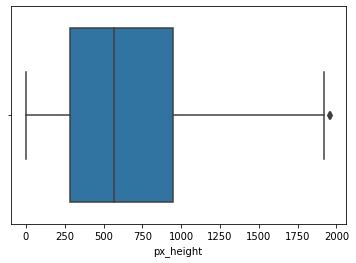

In [ ]:
sns.boxplot(x=data_train['px_height'])

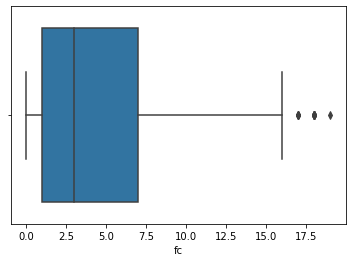

In [ ]:
sns.boxplot(x=data_train['fc'])

Tenang tidak perlu panik kita akan mengatasinya dengan teknik IQR dimana data yang berada di luar Q1 dan Q3 adalah outlier, dimana kita akan menentukan nilai batas atas dan bawah, dengan persamaan berikut:
- Batas bawah = Q1 - 1.5 * IQR
- Batas atas = Q3 + 1.5 * IQR

Langsung saja kita set variabel Q1, Q2 dan IQR-nya



In [ ]:
# set variabel Q1, Q2 dan IQR-nya
Q1 = data_train.quantile(0.25)
Q3 = data_train.quantile(0.75)
IQR=Q3-Q1

# Setelah itu kita hitung dan hapus sekalian data yang tidak sesuai dengan spesifikasi yang kita buat dengan kode berikut
data_train=data_train[~((data_train<(Q1-1.5*IQR))|(data_train>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
data_train.shape

(1506, 21)

Dan sekarang data kita sudah berkurang dari 2000 menjadi 1506 dan jumlah kolomnya tetap 21.

Kita akan melihat 21 kolom yang ada dalam dataset dalam bentuk tabel supaya kita bisa lebih mengetahui tentang isi dari nilai setiap kolom.

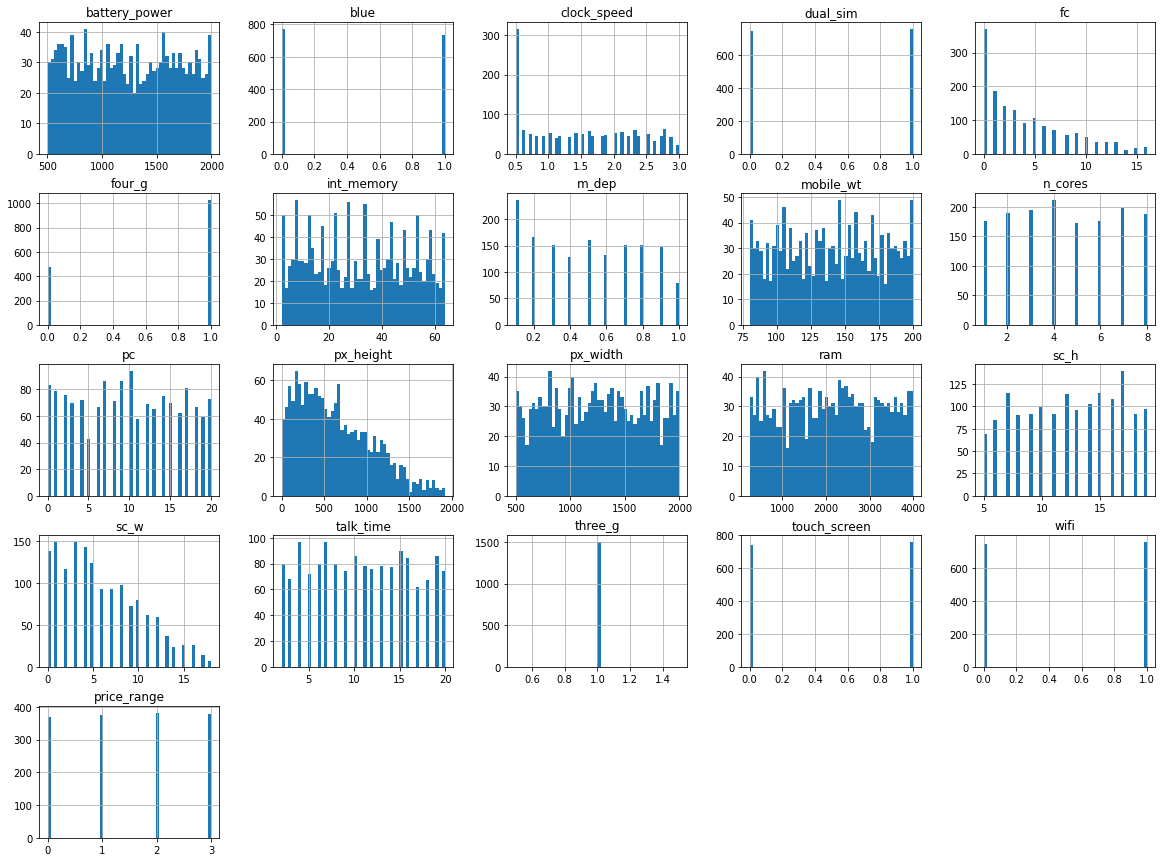

In [ ]:
data_train.hist(bins=50, figsize=(20,15))
plt.show()

Dari tampilan diatas dapat kita simpulkan bahwa ada beberapa variabel yang bertipe biner atau yang isinya hanya 0 dan 1, dan ada yang isinya angka lebih dari itu. Kita lihat list dibawah untuk lebi jelas mana yang memiliki fitur biner dan bukan.

*   binary_features = blue, dual_sim, four_g, three_g, touch_screen, wifi
*   non_binary_features = battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, n_core, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, price_range


In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
# sns.pairplot(data_train[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']], diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Biner ')

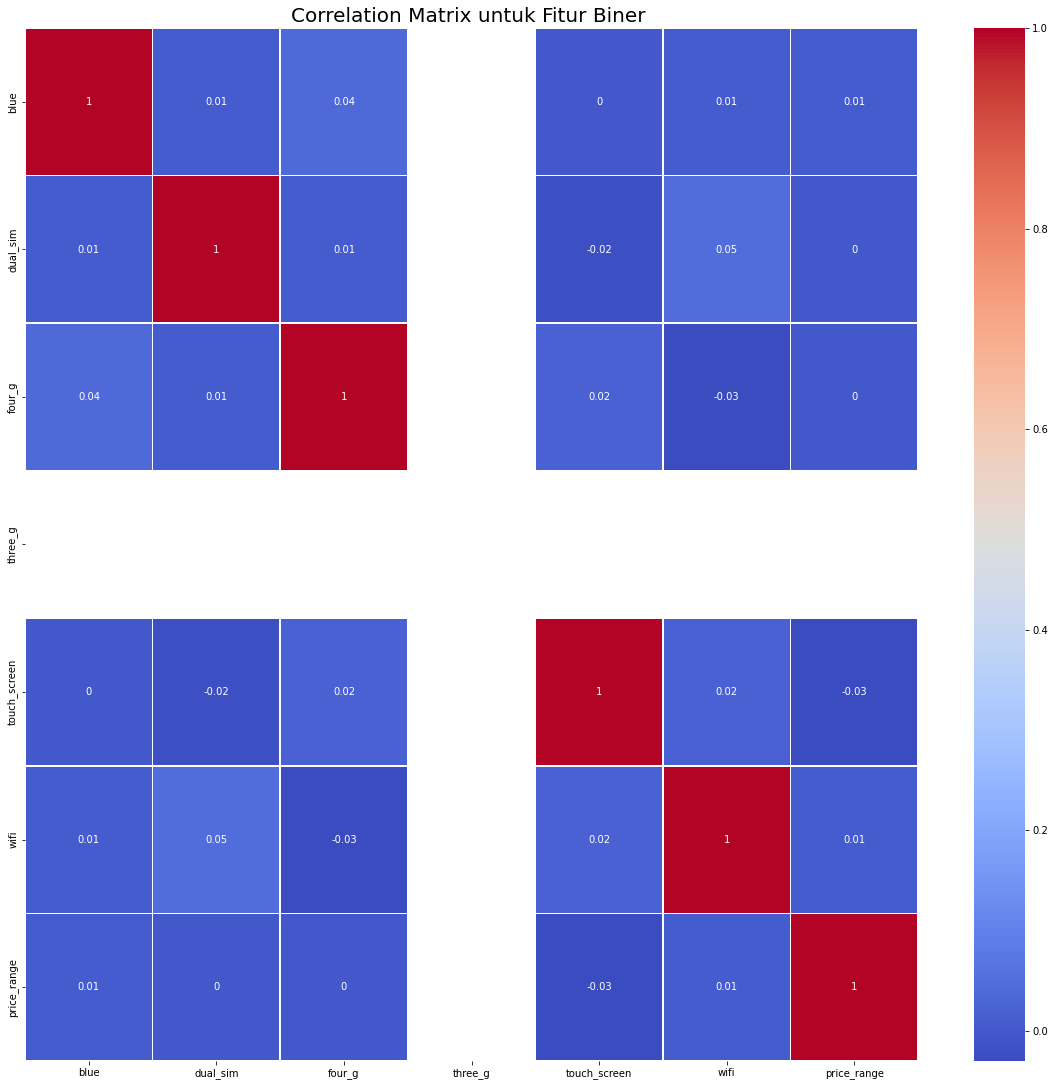

In [ ]:
plt.figure(figsize=(20, 19))
correlation_matrix = data_train[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Biner ", size=20)

Dapat dilihat dalam gambar diatas bahwa fitur three_g tidak memiliki gambar atau gambarnya putih bersih, karena nilai hanya 1 saja atau kebanyakan hp pada dataset sudah masuk kategori three_g semua, jadi kita akan menghapus fitur ini dan fitur touch_screen karena memiliki korelasi paling kecil yaitu minus.

In [ ]:
data_train.drop(['three_g', 'four_g', 'dual_sim'], inplace=True, axis=1)
data_train

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,battery_power,blue,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
1,1021,1,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,2
2,563,1,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,0,2
4,1821,1,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1
5,1859,0,0.5,3,22,0.7,164,1,7,1004,1654,1067,17,1,10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,1,0,0
1996,1965,1,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,2
1997,1911,0,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,0,3
1998,1512,0,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,1,1,0


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Non Biner ')

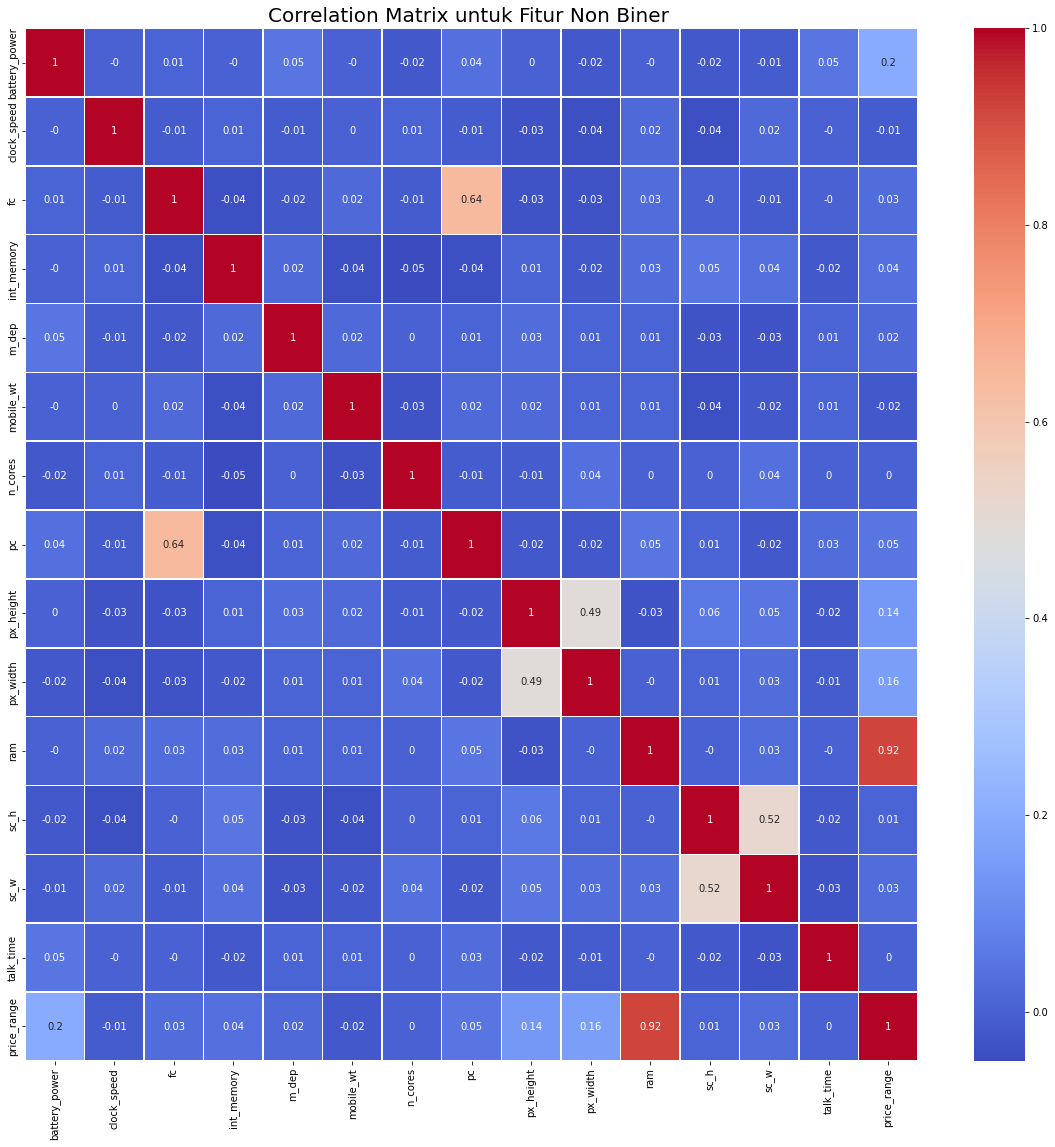

In [ ]:
plt.figure(figsize=(20, 19))
correlation_matrix = data_train[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Non Biner ", size=20)

Dari tampilan gambar diatas dapat disimpulkan bahwa fitur ram adalah yang memiliki korelasi yang paling kuat terhadap fitur price_range, sedangkan fitur clock_speed dan mobile_wt memiliki korelasi panling lemah terhadap fitur price_range kita akan menghapus fitur ini.

In [ ]:
data_train.drop(['n_cores', 'talk_time'], inplace=True, axis=1)
data_train

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,battery_power,blue,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,touch_screen,wifi,price_range
1,1021,1,0.5,0,53,0.7,136,6,905,1988,2631,17,3,1,0,2
2,563,1,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,1,0,2
3,615,1,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,0,0,2
4,1821,1,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,1,0,1
5,1859,0,0.5,3,22,0.7,164,7,1004,1654,1067,17,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,0,2,0.8,106,14,1222,1890,668,13,4,1,0,0
1996,1965,1,2.6,0,39,0.2,187,3,915,1965,2032,11,10,1,1,2
1997,1911,0,0.9,1,36,0.7,108,3,868,1632,3057,9,1,1,0,3
1998,1512,0,0.9,4,46,0.1,145,5,336,670,869,18,10,1,1,0


# **Data Preparation**
Pada bagian ini Anda menerapkan dan menyebutkan teknik data preparation yang dilakukan. Teknik yang digunakan pada notebook dan laporan harus berurutan.

# Rubrik/Kriteria Tambahan (Opsional):

Menjelaskan proses data preparation yang dilakukan
Menjelaskan alasan mengapa diperlukan tahapan data preparation tersebut.


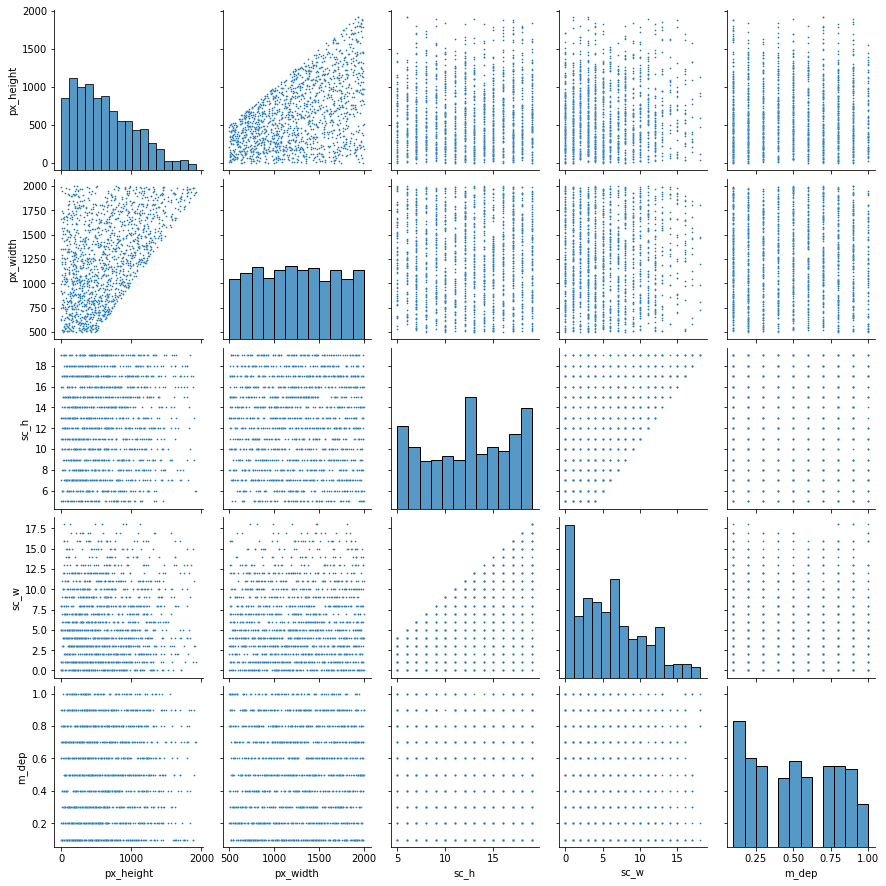

In [ ]:
sns.pairplot(data_train[['px_height', 'px_width','sc_h','sc_w', 'm_dep']], plot_kws={"s": 3});

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(data_train[['px_height', 'px_width']])
princ_comp = pca.transform(data_train[['px_height', 'px_width']])

In [ ]:
pca.explained_variance_ratio_.round(2)

array([0.75, 0.25])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pd.set_option('mode.chained_assignment', None)
pca.fit(data_train[['px_height', 'px_width']])
data_train['resolution_px'] = pca.transform(data_train.loc[:, ('px_height', 'px_width')]).flatten()
data_train.drop(['px_height', 'px_width'], axis=1, inplace=True)

# kita tampilkan hasil dari proses PCA diatas
data_train.head()

,battery_power,blue,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,sc_h,sc_w,touch_screen,wifi,price_range,resolution_px
1,1021,1,0.5,0,53,0.7,136,6,2631,17,3,1,0,2,709.935982
2,563,1,0.5,2,41,0.9,145,6,2603,11,2,1,0,2,777.316144
3,615,1,2.5,0,10,0.8,131,9,2769,16,8,0,0,2,792.356645
4,1821,1,1.2,13,44,0.6,141,14,1411,8,2,1,0,1,386.772940
5,1859,0,0.5,3,22,0.7,164,7,1067,17,1,0,0,1,548.303415


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(data_train[['sc_h','sc_w', 'm_dep']])
princ_comp = pca.transform(data_train[['sc_h','sc_w', 'm_dep']])

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.757, 0.241, 0.002])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pd.set_option('mode.chained_assignment', None)
pca.fit(data_train[['sc_h','sc_w', 'm_dep']])
data_train['dimension_hp'] = pca.transform(data_train.loc[:, ('sc_h','sc_w', 'm_dep')]).flatten()
data_train.drop(['sc_h','sc_w', 'm_dep'], axis=1, inplace=True)

# kita tampilkan hasil dari proses PCA diatas
data_train.head()

,battery_power,blue,clock_speed,fc,int_memory,mobile_wt,pc,ram,touch_screen,wifi,price_range,resolution_px,dimension_hp
1,1021,1,0.5,0,53,136,6,2631,1,0,2,709.935982,1.032958
2,563,1,0.5,2,41,145,6,2603,1,0,2,777.316144,-3.750034
3,615,1,2.5,0,10,131,9,2769,0,0,2,792.356645,4.052512
4,1821,1,1.2,13,44,141,14,1411,1,0,1,386.772940,-5.771506
5,1859,0,0.5,3,22,164,7,1067,0,0,1,548.303415,-0.444524


In [ ]:
from sklearn.model_selection import train_test_split
 
X = data_train.drop(["price_range"],axis =1)
y = data_train["price_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1506
Total # of sample in train dataset: 1204
Total # of sample in test dataset: 302


# **Modeling**
Tahapan ini membahas mengenai model machine learning yang digunakan untuk menyelesaikan permasalahan. Anda perlu menjelaskan tahapan dan parameter yang digunakan pada proses pemodelan.

# Rubrik/Kriteria Tambahan (Opsional):

Menjelaskan kelebihan dan kekurangan dari setiap algoritma yang digunakan.
Jika menggunakan satu algoritma pada solution statement, lakukan proses improvement terhadap model dengan hyperparameter tuning. Jelaskan proses improvement yang dilakukan.
Jika menggunakan dua atau lebih algoritma pada solution statement, maka pilih model terbaik sebagai solusi. Jelaskan mengapa memilih model tersebut sebagai model terbaik.

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_cr', 'test_cr'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# from yellowbrick.classifier import classification_report

# y_true = [0, 1, 2, 3]
# y_pred = [0, 1, 2, 3]
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# target_names = ['0', '1', '2', '3']

#  classification_report(y_true, y_pred, target_names=target_names)
#  print(classification_report(data_test['Target'], prediction_linear, target_names=target_names))
# models.loc['train_mae','knn'] = mean_absolute_error(y_pred = knn.predict(X_train), y_true=y_train)
# models.loc['train_cr','KNN'] =  classification_report(y_test, knn.predict(X_test))
# Accuracy score is the simplest way to evaluate

KNN_prediction = knn.predict(X_test)
print(accuracy_score(KNN_prediction, y_test))

print('')
print('')

print(confusion_matrix(KNN_prediction, y_test))
print('')
print('')
# But Confusion Matrix and Classification Report give more details about performance
print(classification_report(KNN_prediction, y_test))

0.9205298013245033


[[62  3  0  0]
 [ 4 67  5  0]
 [ 0  1 70  7]
 [ 0  0  4 79]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.95        65
           1       0.94      0.88      0.91        76
           2       0.89      0.90      0.89        78
           3       0.92      0.95      0.93        83

    accuracy                           0.92       302
   macro avg       0.92      0.92      0.92       302
weighted avg       0.92      0.92      0.92       302



In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
 
# buat model prediksi
RF = RandomForestClassifier(max_depth=2,
                            random_state=0)
RF.fit(X_train, y_train)
 
models.loc['train_cr','RandomForest'] = classification_report(y_test, RF.predict(X_test))
#  mean_absolute_error(y_pred=RF.predict(X_train), y_true=y_train)        

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
      max_depth=1, random_state=0)
boosting.fit(X_train, y_train)

# models.loc['train_mse','Boosting'] = mean_absolute_error(y_pred=boosting.predict(X_train), y_true=y_train)
models.loc['train_cr','Boosting'] = classification_report(y_test, boosting.predict(X_test))

# **Evaluation**
Pada bagian ini anda perlu menyebutkan metrik evaluasi yang digunakan. Lalu anda perlu menjelaskan hasil proyek berdasarkan metrik evaluasi yang digunakan.

Sebagai contoh, Anda memiih kasus klasifikasi dan menggunakan metrik akurasi, precision, recall, dan F1 score. Jelaskan mengenai beberapa hal berikut:

Penjelasan mengenai metrik yang digunakan
Menjelaskan hasil proyek berdasarkan metrik evaluasi
Ingatlah, metrik evaluasi yang digunakan harus sesuai dengan konteks data, problem statement, dan solusi yang diinginkan.

# Rubrik/Kriteria Tambahan (Opsional):

Menjelaskan formula metrik dan bagaimana metrik tersebut bekerja.

In [ ]:
# Buat variabel mae yang isinya adalah dataframe nilai mae data train dan test pada masing-masing algoritma
cr = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Absolute Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    cr.loc[name, 'train'] = classification_report(y_true=y_train, y_pred=model.predict(X_train))
    cr.loc[name, 'test'] = classification_report(y_true=y_test, y_pred=model.predict(X_test))

# panggil mae
cr

,train,test
KNN,precision recall f1-score ...,precision recall f1-score ...
RF,precision recall f1-score ...,precision recall f1-score ...
Boosting,precision recall f1-score ...,precision recall f1-score ...


TypeError: ignored

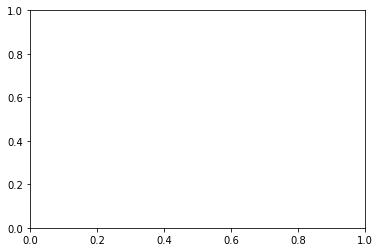

In [ ]:
fig, ax = plt.subplots()
cr.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:25].copy()
pred_dict = {'y_true':y_test[:25]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
460,2,2,2,2
60,1,1,1,1
1786,2,2,1,1
33,3,3,3,3
679,0,0,1,1
632,1,1,1,1
48,0,0,0,1
1089,1,1,2,1
1003,0,0,0,0
206,2,2,2,2
